In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt



In [21]:
data = pd.read_csv('../Data Cleansing/cleaned_data_4.csv', index_col=0)


In [22]:
data.head(5)

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,team_global,next_fixture,next_position,is_home,target
37,1,0,12,0,10.6,51,9,0,0,2.9,...,24.00,1.0,3.00,1,4,1,19,10,False,1
38,0,0,3,0,0.8,51,20,1,0,0.4,...,20.00,0.5,2.00,10,4,1,4,17,False,1
112,0,0,0,0,0.0,424,17,0,0,0.0,...,0.00,1.0,1.50,4,3,17,0,8,True,1
113,0,0,5,0,15.2,424,28,0,0,4.6,...,4.67,1.0,2.00,8,3,17,19,17,False,1
114,0,0,6,0,11.3,424,38,0,0,4.2,...,12.00,2.0,2.33,17,3,17,10,7,True,1


In [23]:
gk_data = data[data['element_type'] == 1]
gk_data.columns
gk_cols = ['bonus', 'bps', 'clean_sheets', 'element',
       'fixture', 'goals_conceded', 'ict_index', 'influence',
       'minutes', 'round', 'saves', 'selected', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'team_scored', 'opposition_scored', 'GlobalOpponent',
       'avg_ict_index', 'avg_total_points', 'avg_bps',
       'avg_minutes', 'avg_3w_influence', 'avg_3w_ict_index',
       'avg_3w_total_points', 'avg_3w_bps', 'avg_3w_minutes',
       'avg_3w_team_scored', 'avg_3w_opposition_scored', 'OpponentPosition',
       'team_global', 'next_fixture', 'next_position',
       'is_home', 'target']
gk_data = gk_data[gk_cols]
gk_data.columns

Index(['bonus', 'bps', 'clean_sheets', 'element', 'fixture', 'goals_conceded',
       'ict_index', 'influence', 'minutes', 'round', 'saves', 'selected',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'team_scored', 'opposition_scored',
       'GlobalOpponent', 'avg_ict_index', 'avg_total_points', 'avg_bps',
       'avg_minutes', 'avg_3w_influence', 'avg_3w_ict_index',
       'avg_3w_total_points', 'avg_3w_bps', 'avg_3w_minutes',
       'avg_3w_team_scored', 'avg_3w_opposition_scored', 'OpponentPosition',
       'team_global', 'next_fixture', 'next_position', 'is_home', 'target'],
      dtype='object')

In [24]:
other_data = data[data['element_type'] != 1]
other_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'minutes', 'round', 'selected', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'team_scored', 'opposition_scored', 'GlobalOpponent',
       'avg_influence', 'avg_ict_index', 'avg_total_points', 'avg_bps',
       'avg_minutes', 'avg_3w_influence', 'avg_3w_ict_index',
       'avg_3w_total_points', 'avg_3w_bps', 'avg_3w_minutes',
       'avg_3w_team_scored', 'avg_3w_opposition_scored', 'OpponentPosition',
       'element_type', 'team_global', 'next_fixture', 'next_position',
       'is_home', 'target']
other_data = other_data[other_cols]

In [26]:
datasets = {'gk': {'data': gk_data}, 'other': {'data': other_data}}

for i in datasets:

    current_dic = datasets[i]

    current_dic['target'] = current_dic['data']['target']
    current_dic['in_data'] = current_dic['data'].drop(['target', 'element'], axis = 1)

    current_dic['train_features'], current_dic['test_features'], current_dic['train_labels'], current_dic['test_labels'] = train_test_split(current_dic['in_data'], current_dic['target'], test_size = 0.25, random_state = 42)
    
   




In [ ]:
for i in datasets:
    current_dic = datasets[i]
    # Use the forest's predict method on the test data
    current_dic['predictions'] = current_dic['rf_random'].predict(current_dic['test_features'])
    # Calculate the absolute errors
    errors = abs(current_dic['predictions'] - current_dic['test_labels'])
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'points (', i, ')')

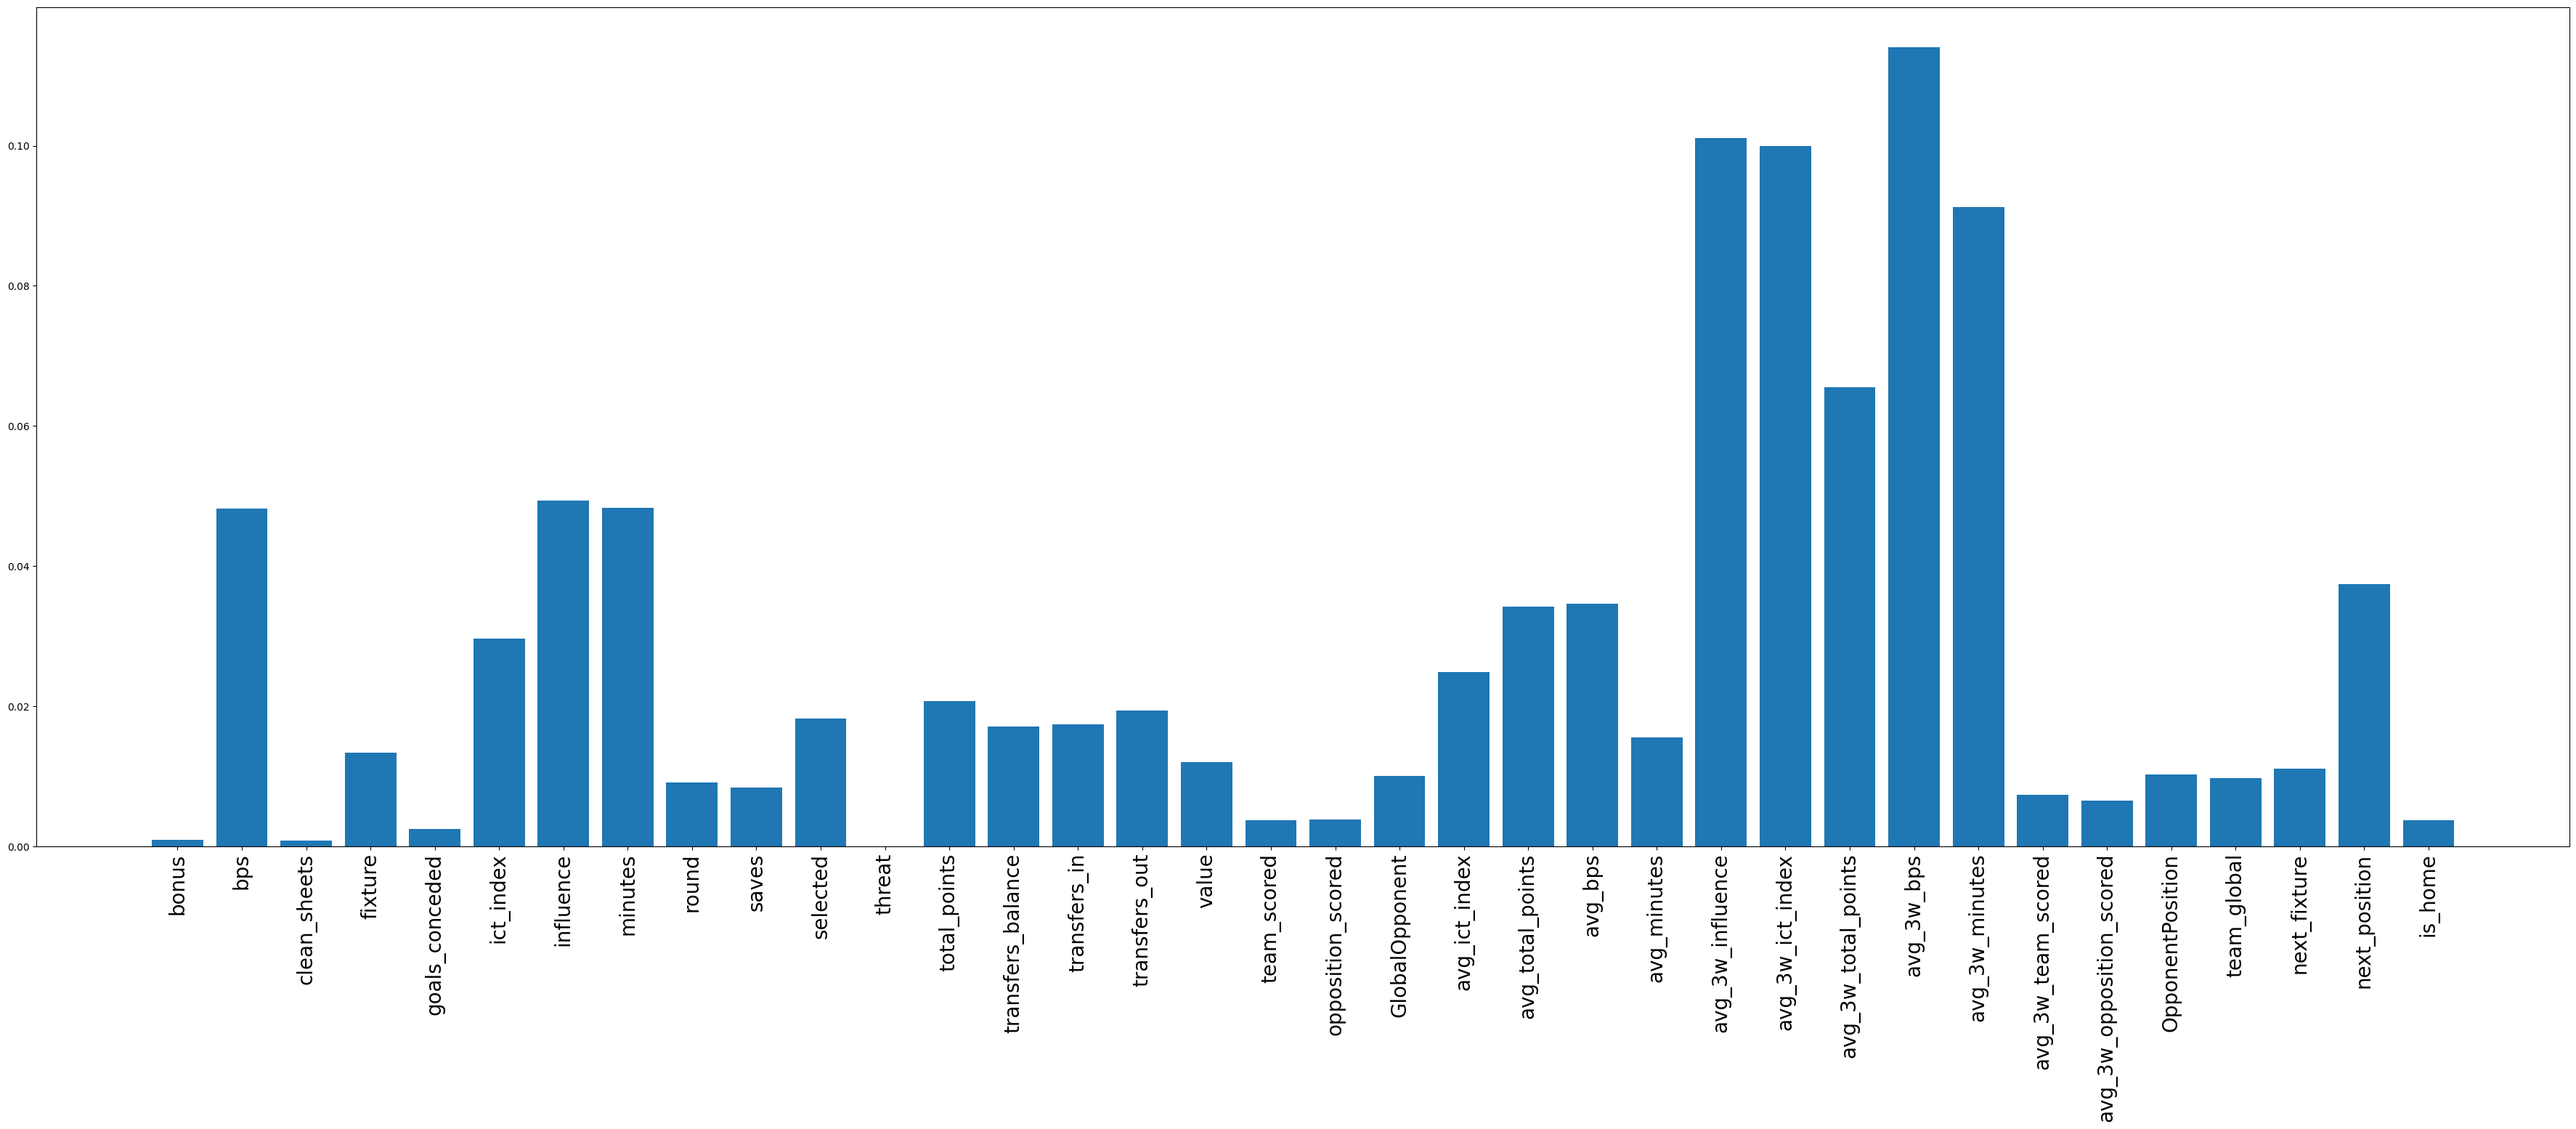

[DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5, random_state=1674992899), DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5, random_state=1141004320), DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5, random_state=303615888), DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5, random_state=277888051), DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5, random_state=1416685909), DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5, random_state=1956441656), DecisionTreeRegressor(max_depth=70, max_features='sqrt', min_samples_leaf=16,
                      min_samples_split=5

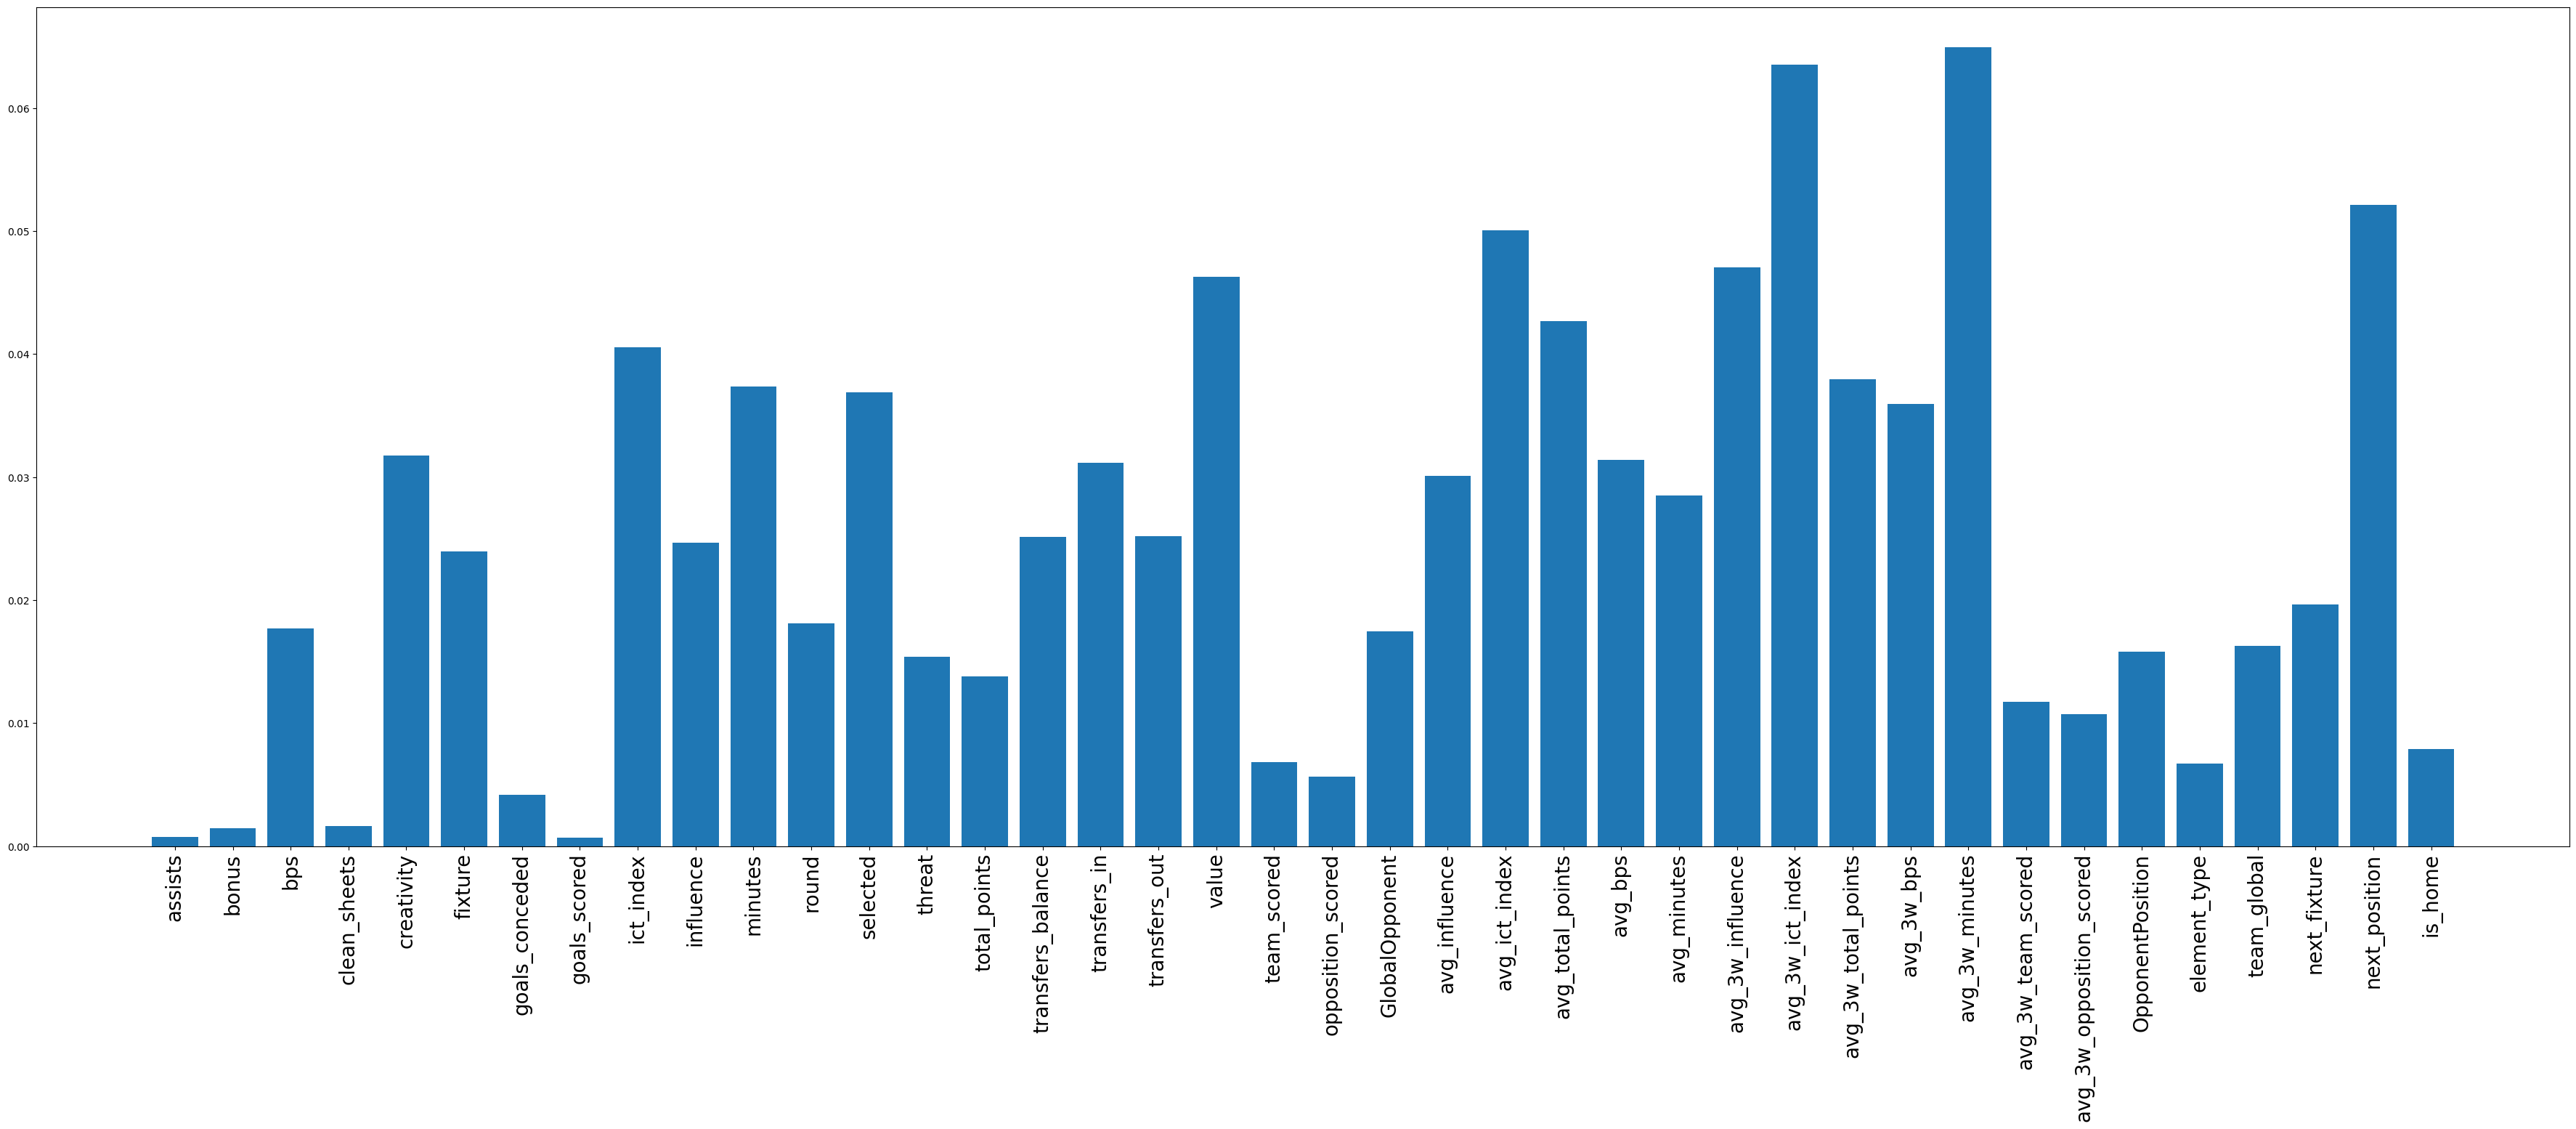

[DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, random_state=1705504894), DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, random_state=1962124394), DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, random_state=2140975535), DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, random_state=1996426969), DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, random_state=1539759848), DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=10, random_state=48811432), DecisionTreeRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=8,
                      min_samples_s

In [27]:
for i in datasets:

    current_dic = datasets[i]

    #joblib.dump(current_dic['rf_random'].best_estimator_, "./temp/rf_split_"+ i + ".joblib")

    #model =current_dic['rf_random'].best_estimator_
    model = joblib.load("./temp/rf_split_"+ i + ".joblib")


    plt.figure(figsize = (45,15))
    plt.xticks(rotation = 90, fontsize=20)
    plt.bar(model.feature_names_in_, model.feature_importances_)
    plt.show()

    print(model.estimators_)

    # Use the forest's predict method on the test data
    current_dic['predictions'] = model.predict(current_dic['test_features'])
    # Calculate the absolute errors
    errors = abs(current_dic['predictions'] - current_dic['test_labels'])
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'points (', i, ')')

# Test

In [34]:
test_data = pd.read_csv('/Users/bence/Documents/Personal Projects/FPL/Data Cleansing/cleaned_data_4_test.csv', index_col=0)
test_data.head(2)

,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,...,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,id,team_global,next_fixture,next_position,is_home,target
0,0,0,8,0,0.3,265,0.03,0.07,0.04,1.50,...,0.0,1.0,5,2,265,5,26,10,False,0
1,0,0,14,0,0.5,265,0.01,0.22,0.21,3.11,...,0.0,2.5,10,2,265,5,25,15,True,2


In [39]:
gk_test = test_data[test_data['element_type'] == 1]
other_test = test_data[test_data['element_type'] != 1]

datasets['gk']['test'] = gk_test
datasets['other']['test'] = other_test


In [40]:
for i in datasets:
    current_dic = datasets[i]
    current_data = current_dic['test']

    model = joblib.load("./temp/rf_split_"+ i + ".joblib")


    cols_to_keep = [*model.feature_names_in_]
    cols = [*current_data.columns]
    to_drop  = []
    for col in cols:
        if col not in cols_to_keep:
            to_drop.append(col)

    print(to_drop)

    predict_data = data.drop(labels = to_drop, axis =1, inplace=False)
    
    element_target = data[['element', 'target']]
    predictions = model.predict(predict_data)
    final_data = pd.concat([element_target['element'], predict_data, pd.Series(predictions, name = 'predictions'), element_target['target']], axis = 1)
    current_dic['final_data'] = final_data


['assists', 'creativity', 'element', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'goals_scored', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'starts', 'yellow_cards', 'avg_influence', 'element_type', 'id', 'target']
['element', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'starts', 'yellow_cards', 'id', 'target']


In [44]:
datasets['gk']['final_data']['element_type'] = 1
final_data = pd.concat([datasets['gk']['final_data'], datasets['other']['final_data']], axis = 0)

In [46]:
final_data.to_csv('Test/final_data.csv')